In [1]:
from flax import linen as nn
import numpy as np
from typing import Any, Callable, Optional, Tuple, Type, List
from jax import lax, random, numpy as jnp
import einops
import torchio
import torch
import matplotlib.pyplot as plt
import tempfile
import shutil
import os
import glob
import jax
import tensorflow as tf
import torch 
import einops
import torchio as tio
import optax
from flax.training import train_state  
from torch.utils.data import DataLoader
import jax.profiler
import ml_collections
from ml_collections import config_dict
from testUtils.spleenTest import get_spleen_data


/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cached_subj =get_spleen_data()[0]
sample_3d_ct=cached_subj[0]
sample_2d_ct=sample_3d_ct[0,0,:,:,64]
sample_2d_Slic=cached_subj[2][:,:,64]



data loaded from hdf5


In [3]:
jax.image.resize(sample_3d_ct, (1,1,20,20,20), "linear")

Array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         ...,

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0.

(256, 256)

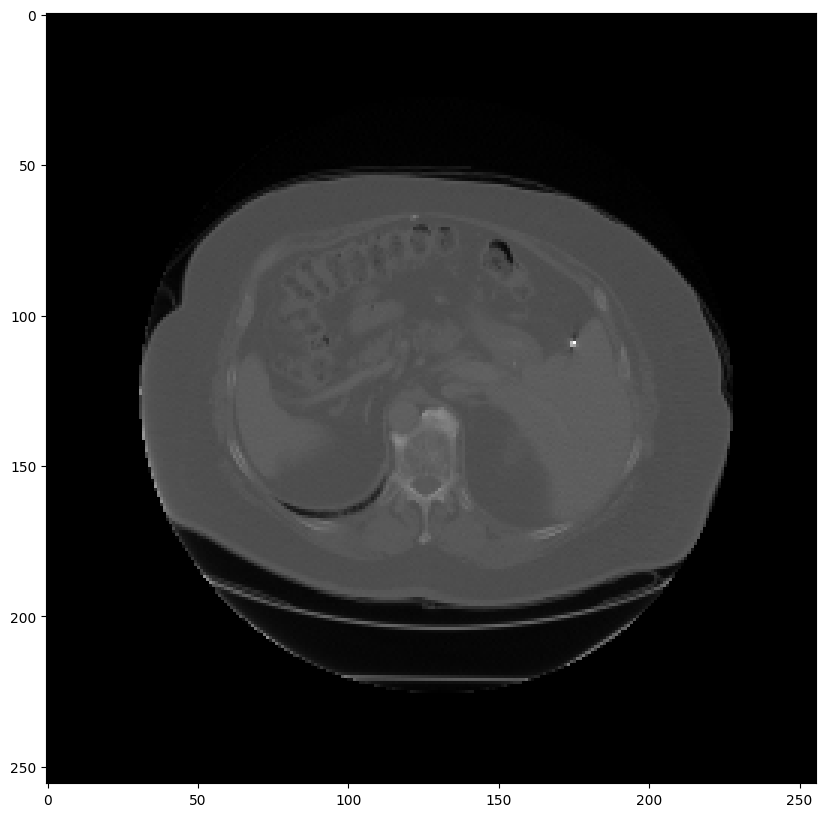

In [4]:
plt.figure(figsize=(20, 10))
plt.style.use('grayscale')
plt.imshow(np.rot90(sample_2d_ct))
sample_2d_ct.shape

(256, 256)


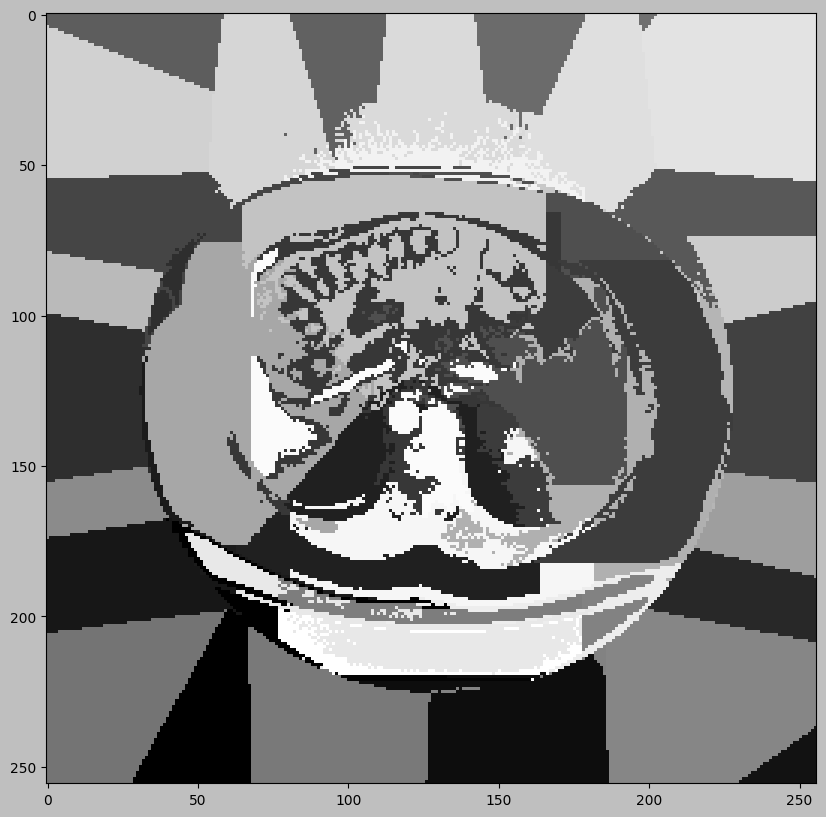

In [5]:
print(sample_2d_Slic.shape)
# sample_2d_Slic=jax.image.resize(sample_2d_Slic, (20,20), "linear")
plt.figure(figsize=(20, 10))
# plt.style.use('grayscale')
plt.imshow(np.rot90(sample_2d_Slic))

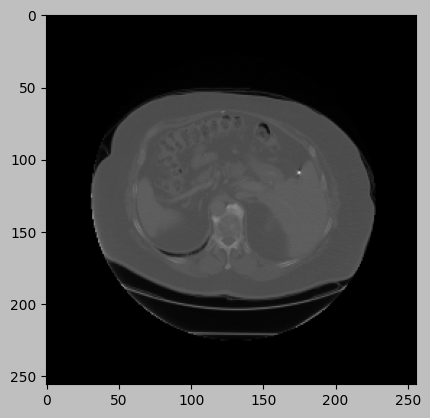

In [6]:
import pywt, scipy.misc
import jaxwt as jwt
import jax.numpy as jnp

#,level=2, mode="reflect"
@jax.jit
def test(sample_2d_ct):                           
    transformed = jwt.wavedec2(sample_2d_ct, pywt.Wavelet("haar"),mode="zero")
    # print(len(transformed))
    # print(transformed[0].shape)
    return jwt.waverec2(transformed, pywt.Wavelet("haar"))
reconstruction=test(sample_2d_ct)

plt.imshow(np.rot90(reconstruction))



In [7]:
aaa=jnp.arange(4*4*4)
aaa=jnp.reshape(aaa,(1,1,4,4,4))
print(f"aaa {aaa}")
# a,b=einops.rearrange(aaa,'ba c w (a b) d->b ba c w a d',b=2)
# a,b=einops.rearrange(aaa,'ba c (a b) h d->b ba c a h d',b=2)
a,b=einops.rearrange(aaa,'ba c w h (a b)->b ba c w h a',b=2)
a

aaa [[[[[ 0  1  2  3]
    [ 4  5  6  7]
    [ 8  9 10 11]
    [12 13 14 15]]

   [[16 17 18 19]
    [20 21 22 23]
    [24 25 26 27]
    [28 29 30 31]]

   [[32 33 34 35]
    [36 37 38 39]
    [40 41 42 43]
    [44 45 46 47]]

   [[48 49 50 51]
    [52 53 54 55]
    [56 57 58 59]
    [60 61 62 63]]]]]


Array([[[[[ 0,  2],
          [ 4,  6],
          [ 8, 10],
          [12, 14]],

         [[16, 18],
          [20, 22],
          [24, 26],
          [28, 30]],

         [[32, 34],
          [36, 38],
          [40, 42],
          [44, 46]],

         [[48, 50],
          [52, 54],
          [56, 58],
          [60, 62]]]]], dtype=int64)

In [8]:
# def normpdf(x, mean, sd):
#     var = jnp.power(float(sd),2)
#     denom = jnp.power((2*jnp.pi*var),.5)
#     num = jnp.exp(-jnp.power((float(x)-float(mean)),2)/(2*var))
#     return num/denom
# normpdf(0.1,0.0,0.2)
jnp.equal(jnp.array([1,2,3]),jnp.array([1,2,4]))
# float(jax.scipy.stats.norm.pdf(0.001, loc=0, scale=0.01)

Array([ True,  True, False], dtype=bool)

In [9]:
from flax import linen as nn
import numpy as np
from typing import Any, Callable, Optional, Tuple, Type, List
from jax import lax, random, numpy as jnp
import einops
import torchio
import torch
import matplotlib.pyplot as plt
import tempfile
import shutil
import os
import glob
import jax
import tensorflow as tf
import torch 
import einops
import torchio as tio
import optax
from flax.training import train_state  
from torch.utils.data import DataLoader
import jax.profiler
import ml_collections
from ml_collections import config_dict
import numpy as np
import toolz
from einops import rearrange
from functools import partial

In [10]:
test_mage_shape= (1,1,32,32)
prob0_v= np.random.rand(np.product((1, 2, 2, 2))).reshape((1, 2, 2, 2))
prob0_h= np.random.rand(np.product((1, 2, 4, 2))).reshape((1, 2, 4, 2))
prob0_h_flat= np.random.rand(480)
# aranged_test_im= np.arange(np.product(list(test_mage_shape)))
aranged_test_im= np.random.rand(np.product(list(test_mage_shape)))
aranged_test_im= np.reshape(aranged_test_im, test_mage_shape)

b,c,w,h = test_mage_shape


In [11]:
# def cross_entropy(logprobs, targets):
#   target_class = jnp.argmax(targets, axis=1)
#   nll = jnp.take_along_axis(logprobs, jnp.expand_dims(target_class, axis=1), axis=1)
#   ce = -jnp.mean(nll)
#   return ce

@jax.vmap
def my_cross_entropy_loss(logits, label):
  return -logits[label]


In [16]:
### calculating gt_id as far as I see it is deterministic given image and dimension of intrest



# a1,a2=einops.rearrange(aranged_test_im,'ba c (a b) h->b ba c a h',b=2)
def lab_s_dim_loss(pair, axis_to_sub,prob):
    a1,a2=pair
    
    # print(f"aa {a2.take(indices=range(0, -1), axis=axis_to_sub).shape} bb {a2.take(indices=range(1,a2.shape[axis_to_sub]-1), axis=axis_to_sub).shape} ")
    # print(f"aa {a2.take(indices=range(0, -1), axis=axis_to_sub).shape} bb {a2.take(indices=range(1,a2.shape[axis_to_sub]-1), axis=axis_to_sub).shape} ")
    
    sub1=a2.take(indices=range(0, a2.shape[axis_to_sub]-1), axis=axis_to_sub)- a1.take(indices=range(0, a1.shape[axis_to_sub]-1), axis=axis_to_sub)
    sub2=a2.take(indices=range(0, a2.shape[axis_to_sub]-1), axis=axis_to_sub)- a1.take(indices=range(1,a1.shape[axis_to_sub]), axis=axis_to_sub)
   
    cat_feat=einops.rearrange([sub1,sub2],'baba ba c w h->ba (c baba ) w h')

    # cat_feat=einops.rearrange([(a2[:,:, :,0:-1]-a1[:,:,:,0:-1])
    #                 ,(a2[:,:,:,0:-1]-a1[:,:,:,1:])], 'baba ba c w h->ba (c baba ) w h')
    # cat_feat=einops.rearrange([(a2[:,:, 0:-1 ,:]-a1[:,:,0:-1,:])
    #                 ,(a2[:,:, 0:-1 ,:]-a1[:,:,1:,:])], 'baba ba c w h->ba (c baba ) w h')
    
    cat_feat=cat_feat*cat_feat
    cat_feat = jax.nn.relu(-jax.nn.relu(cat_feat)+1)
    to_id= einops.rearrange(cat_feat,'b c w h-> (b w h c)')
    to_id= einops.rearrange(to_id,'(a b)-> a b',b=2)

    gt_id= jnp.argmax(to_id,axis=1, keepdims=False)
    # gt = cat_feat[:, 0, :, :] - cat_feat[:, 1, :, :] #so we are working on channel
    # weight = gt * gt
    # print(f"prob {prob.shape}")
    # prob_scaled= prob.take(indices=range(0, prob.shape[axis_to_sub],2), axis=axis_to_sub)
    # # prob_scaled= prob.take(indices=range(0, prob.shape[axis_to_sub]-2,2), axis=axis_to_sub)
    # prob_scaled= einops.rearrange(prob_scaled,'b c w h-> (b w h c)')
    # prob_scaled= einops.rearrange(prob_scaled,'(a b)-> a b',b=2)
    
    # print(f" prob_scaled {prob_scaled.shape} gt_id {gt_id.shape} ")
    # color_loss=my_cross_entropy_loss(prob_scaled,gt_id)
    

    return to_id


prob0_hh= jnp.array(prob0_h)
# aranged_test_im= jnp.ones(test_mage_shape)
gt_id=lab_s_dim_loss(einops.rearrange(jnp.array(aranged_test_im),'ba c (a b) h->b ba c a h',b=2),axis_to_sub=2,prob=prob0_hh)
# gt_id=lab_s_dim_loss(einops.rearrange(aranged_test_im,'ba c w (a b)->b ba c w a',b=2),axis_to_sub=3)
print(gt_id)
gt_id.shape
# jnp.ravel(cat_feat)


TypeError: Argument 'range(0, 15)' of type <class 'range'> is not a valid JAX type.

res 7040


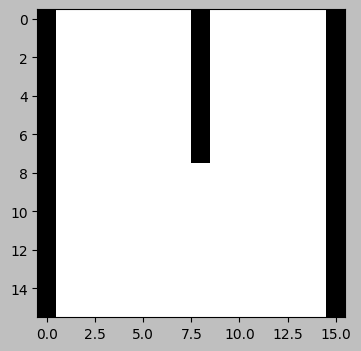

In [93]:
shapee=(16,16,16)
aaa=np.ones(shapee)
# aaa[2,2,2]=2
aaa[0:8,0:8,0:8]=2
# aaa[1,0,0]=2
# aaa=np.arange(np.product(list(shapee))).reshape(shapee)
# aaa[:,::2,:]=2
# aaa[::2,:,:]=2
# aaa[:,:,::2]=2
aaa= jnp.array(aaa)
# sh= aaa.shape
# chosen_axis=0
# to_query=[0,aaa[0],0,aaa[1],0,aaa[2]]  
# sub_up_indicies_a=to_query.copy()
# sub_up_indicies_b=to_query.copy()
# sub_down_indicies_a=to_query.copy()
# sub_down_indicies_b=to_query.copy()
# sub_up_indicies_a[((chosen_axis+1)*2)-1]=-1
# sub_up_indicies_b[chosen_axis*2]=1

# sub_up_indicies_a[((chosen_axis+1)*2)-1]=-1
# sub_up_indicies_b[chosen_axis*2]=1

def compare_up_and_down(vect):
    res=jnp.stack([jnp.equal(vect[1:-1],vect[2:] ),
                jnp.equal(vect[1:-1],vect[0:-2] )],axis=1)
    return jnp.pad(res,((1,1),(0,0)))

v_compare_up_and_down=jax.vmap(compare_up_and_down, in_axes=(0,), out_axes=0)
v_v_compare_up_and_down=jax.vmap(v_compare_up_and_down, in_axes=(0,), out_axes=0)
res=v_v_compare_up_and_down( aaa)


# sub_up=jnp.equal(jnp.take(aaa, jnp.arange(0,len_in_axis-1), axis=chosen_axis),jnp.take(aaa,  jnp.arange(1,len_in_axis), axis=chosen_axis))
# sub_up=jnp.equal(aaa[1:-1,:,:],aaa[0:-2,:,:]  )
# sub_down=jnp.equal(aaa[1:-1,:,:],aaa[2:,:,:]  )
# sub_down=jnp.equal(aaa,jnp.roll(aaa, -1, axis=chosen_axis))

# print(f"rolled {jnp.roll(aaa, 1, axis=chosen_axis)} ")
print(f"res {jnp.sum(res)}")
# print(f"sub_down {sub_down} ")
plt.figure(figsize=(4,4))
# plt.style.use('grayscale')
# plt.imshow(jnp.logical_and(sub_up[:,:,7],sub_down[:,:,7]))
plt.imshow(res[:,1,:,1])
# plt.imshow(jnp.take(aaa, jnp.arange(1,len_in_axis), axis=chosen_axis)[:,:,])
# print(f"sub_up {sub_up.shape} sub_down {sub_down.shape} ")

In [131]:
import flax
def diff_round(x):
    """
    differentiable version of round function
    """
    return x - jnp.sin(2*jnp.pi*x)/(2*jnp.pi)

def harder_diff_round(x):
    return diff_round(diff_round(diff_round(diff_round(diff_round(x)))))

v_harder_diff_round=jax.vmap(harder_diff_round)
grid_vect=jnp.arange(10)
probs= jnp.array(np.random.random((10,2)))
probs= flax.linen.softmax(probs,axis=1)
thresholded = v_harder_diff_round(probs)
grid_vect= jnp.pad(grid_vect,(1,1))
stacked = jnp.stack([grid_vect[:-2],grid_vect[2:]],axis=1)
mult=jnp.multiply(stacked,thresholded)
jnp.round(jnp.sum(mult,axis=1),2).shape
# print(grid_vect[:-2])
# print(grid_vect[1:-1])
# print(grid_vect[2:])
# image=jnp.arange(3*3)
# aaa=einops.rearrange(image, '(a x) -> a x ', a=3)

# einops.repeat(aaa, 'h w ->c h w ', c=2)


(10,)

In [174]:
shape = (5,2)
probs=jnp.arange(1,np.product(list(shape))+1).reshape(shape)
# probs= jnp.pad(probs,((1,0),(0,0)))
rolled=probs.flatten()[1:-1].reshape(shape[0]-1,2)
rolled=jnp.sum(rolled,axis=1)
rolled=einops.rearrange(rolled,'(a b)-> a b',b=2)
print(rolled)
grid_vect=jnp.pad(jnp.arange(1,6),(0,1))
grid_vect=einops.rearrange(grid_vect,'(a b)-> a b',b=2)

#we are still before sigmoid or softmax

grid_vect
# set bigget examples and mark just those points 
# that intrest me

[[ 5  9]
 [13 17]]


Array([[1, 2],
       [3, 4],
       [5, 0]], dtype=int64)

In [ ]:
    [[ 1  2]
x1    [ 3  4]
    [ 5  6]
x2    [ 7  8]
    [ 9 10]]

x1    [[ 5,  9],
x2    [13, 17]]


In [175]:
a=jnp.arange(1,6)
b=jnp.arange(1,6)*10
jnp.stack([a,b],axis=1).flatten()

Array([ 1, 10,  2, 20,  3, 30,  4, 40,  5, 50], dtype=int64)

In [130]:
def diff_round(x):
    return x - jnp.sin(2*jnp.pi*x)/(2*jnp.pi)
x=0.1
diff_round(diff_round(diff_round(diff_round(x))))

Array(0., dtype=float64, weak_type=True)

In [13]:
kernel_v = jnp.array([[[0, -1, 0], [0, 1, 0], [0, 0, 0]],
            [[0, 0, 0], [0, 1, 0], [0, -1, 0]]],dtype=jnp.float32)
# kernel_v=einops.rearrange(kernel_v,'c x y-> 1 c x y')

image_rgb= jnp.array(aranged_test_im,dtype=jnp.float32)
print(image_rgb.shape)
# image_rgb=einops.rearrange(image_rgb,'b c x y-> (b c x) y')
image_rgb = jnp.pad(image_rgb, ((0, 0),(0, 0),(0, 0), (1, 1)), mode='edge')# seem in numpy we are padding from first to last axis and in pytorch in opposite way

repeated= einops.repeat(kernel_v, 'c h w -> (c c2) 1 h w', c2=c)
print(f"repeated {repeated.shape} padded {image_rgb.shape}")

cat_feat = lax.conv_general_dilated(image_rgb,    # lhs = NCHW image tensor
               repeated, # rhs = OIHW conv kernel tensor
               (2, 1),  # window strides
                padding=((0, 0),(0, 0)),
               feature_group_count= c) # padding mode
print(f"cat_feat {cat_feat} ")
cat_feat = cat_feat*cat_feat

cat_feat = jax.nn.relu(-jax.nn.relu(cat_feat)+1)
b, c, h, w = cat_feat.shape
print(f" cat_feat.shape {cat_feat.shape}")
b, c, h, w = cat_feat.shape
cat_feat= einops.rearrange(cat_feat,'b c h w->(b h w c)')
cat_feat= einops.reduce(cat_feat,'(a b)-> a', 'max',b=2)

# cat_feat=reduce(x, 't b c -> b c', 'max')
print(f"cat_feat reduced {cat_feat.shape}")
# _, gt_id = cat_feat.permute(0, 2, 3, 1).reshape(-1, 2).max(1, keepdim=False)

# print(f"gt_id {gt_id.shape} permuted {cat_feat.permute(0, 2, 3, 1).shape} reshaped {cat_feat.permute(0, 2, 3, 1).reshape(-1, 2).shape} ")



(1, 1, 32, 32)
repeated (2, 1, 3, 3) padded (1, 1, 32, 34)
cat_feat [[[[ 0.01026028  0.9694882   0.41662994  0.5985284   0.47266048
     0.6645934   0.44669834  0.30535513  0.83197105  0.07316071
    -0.35081363 -0.43575037  0.4795516  -0.6447923  -0.05848563
    -0.5516688  -0.342985    0.23745838  0.6907701   0.5193918
    -0.6817091  -0.7436359  -0.15357143 -0.33725265 -0.3177105
     0.00189009  0.04693514 -0.1441409  -0.04581752  0.8976538
     0.65068394 -0.05134986]
   [ 0.31864548  0.7174501   0.1653511  -0.52247     0.47353134
     0.16806726  0.3255611  -0.20475751 -0.11757826 -0.16021368
    -0.25129795  0.73180807  0.3457294  -0.5492523   0.21925467
     0.43159008  0.03518311 -0.14554721  0.06375341  0.55141634
     0.07853579 -0.13544558 -0.47100133 -0.00426292 -0.1544284
    -0.22326195 -0.4779805  -0.53675306 -0.27930772 -0.23378164
     0.29626542  0.6228992 ]
   [ 0.7797984   0.05400866 -0.20285666  0.4117512   0.49402946
    -0.09761119 -0.3371308  -0.3234098   0.058

In [14]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
from skimage.segmentation import mark_boundaries
import cv2
label= torch.from_numpy(aranged_test_im).float()
prob0_h= torch.from_numpy(prob0_h).float()
prob0_h_flat= torch.from_numpy(prob0_h_flat).float()
_, color_c, _, _ = label.shape


kernel = [[[0, -1, 0], [0, 1, 0], [0, 0, 0]],
            [[0, 0, 0], [0, 1, 0], [0, -1, 0]]]
kernel = torch.tensor(kernel).float().repeat(color_c, 1, 1).unsqueeze(1)
# cat_feat = img
label = F.pad(label, (1, 1, 0, 0), mode='replicate')
cat_feat = F.conv2d(label, kernel, stride=(2, 1), padding=(0, 0), groups=color_c)
cat_feat = cat_feat*cat_feat

cat_feat = F.relu(-F.relu(cat_feat)+1)
b, c, h, w = cat_feat.shape
_, gt_id = cat_feat.permute(0, 2, 3, 1).reshape(-1, 2).max(1, keepdim=False)
# print(f"reshaped prob {prob0_h[:, :, 1:-1:2, :].permute(0, 2, 3, 1).reshape(-1, 2).shape} gt_id {gt_id.shape}")
# color_loss = torch.nn.functional.cross_entropy(prob0_h_flat, gt_id.float(),reduction='none')
# color_loss = cross_loss(prob0_h[:, :, 1:-1:2, :].permute(0, 2, 3, 1).reshape(-1, 2), gt_id)
# color_loss = cross_loss(prob0_h_flat, gt_id.float())
# print(f"color_loss {color_loss.shape}")
# color_loss = color_loss.view(b, h, w)

# gt = cat_feat[:, 0, :, :] - cat_feat[:, 1, :, :]
# weight = gt * gt
# color_loss = weight*color_loss
# color_loss = torch.sum(torch.sum(color_loss, dim=-1), dim=-1)
gt_id

tensor([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
        1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [15]:
_, color_c, _, _ = label.shape
kernel = [[[0, 0, 0], [-1, 1, 0], [0, 0, 0]],
            [[0, 0, 0], [0, 1, -1], [0, 0, 0]]]


            
kernel = torch.tensor(kernel).float().repeat(color_c, 1, 1).unsqueeze(1)
# cat_feat = img
label = F.pad(label, (0, 0, 1, 1), mode='replicate')
cat_feat = F.conv2d(label, kernel, stride=(1, 2), padding=(0, 0), groups=color_c)
cat_feat = cat_feat * cat_feat
print(f"cat_feat {cat_feat}")

cat_feat = F.relu(-F.relu(cat_feat) + 1)
b, c, h, w = cat_feat.shape
_, gt_id = cat_feat.permute(0, 2, 3, 1).reshape(-1, 2).max(1, keepdim=False)
print(gt_id.shape)
gt_id

cat_feat tensor([[[[0.0000e+00, 7.9770e-02, 1.0697e-01,  ..., 3.8141e-01,
           2.0460e-01, 2.6547e-02],
          [0.0000e+00, 7.3128e-02, 4.0482e-02,  ..., 4.3907e-01,
           1.2532e-01, 7.0622e-03],
          [0.0000e+00, 4.1515e-02, 4.9579e-01,  ..., 4.6110e-01,
           3.4453e-01, 4.0761e-02],
          ...,
          [0.0000e+00, 3.7935e-02, 8.9452e-02,  ..., 1.2288e-02,
           4.0464e-02, 5.1836e-02],
          [0.0000e+00, 8.3432e-02, 1.4928e-01,  ..., 1.9400e-01,
           8.4559e-02, 4.6631e-01],
          [0.0000e+00, 5.6350e-01, 3.8142e-01,  ..., 1.7881e-01,
           2.6890e-03, 3.6983e-03]],

         [[6.7050e-02, 7.1762e-02, 4.7737e-02,  ..., 8.1076e-03,
           9.7280e-02, 1.0820e-02],
          [4.9040e-01, 7.3935e-03, 7.0520e-04,  ..., 1.0208e-02,
           3.9889e-01, 6.4972e-01],
          [4.6275e-02, 6.5828e-01, 1.3667e-03,  ..., 3.7024e-03,
           4.2777e-03, 7.7345e-02],
          ...,
          [8.0497e-02, 1.9021e-05, 1.6690e-03,  ..

tensor([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
        0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,